In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_values = ['na','--','?','-','None','none','non']
df=pd.read_csv(r'C:\Users\dominika.leszko\Desktop\Piwo\piwo-test\piwo.csv', na_values=missing_values)
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


# Question1
### Which brewery produces the strongest beers by ABV%?

In [3]:
#Feature selection and null values handling
df_q1=df[['brewery_id', 'brewery_name','beer_abv']]

df_q1.isna().sum()

brewery_id          0
brewery_name       15
beer_abv        67785
dtype: int64

In [4]:
#Drop reviews without beer_abv value
df_q1=df_q1[['brewery_id','beer_abv']].dropna()

#Get average ABV rating per brewery
df_q1.groupby('brewery_id').mean().reset_index().sort_values(by='beer_abv', ascending=False).head(3)

,brewery_id,beer_abv
2243,6513,19.228824
3430,14060,15.200000
1405,2873,13.840000


In [5]:
df[df['brewery_id']==6513]['brewery_name'].head(1)

12909    Schorschbräu
Name: brewery_name, dtype: object

### Answer: The Schorschbräu brewery produces the strongest beers with average 19.23 ABV%

# Question 2
## If you had to pick 3 beers to recommend using only this data, which would you pick?

In [6]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [7]:
#Feature selection and null values handling

df_q2=df[['beer_beerid', 'beer_name', 'review_overall', 'review_aroma', 'review_appearance', 'review_palate',
       'review_taste']]

df_q2.isna().sum()

beer_beerid          0
beer_name            0
review_overall       0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
dtype: int64

In [8]:
#Add a column summing up all the ratings
df_q2=df_q2.copy()

df_q2['total_rating']=df_q2[['review_overall', 'review_aroma', 'review_appearance', 'review_palate',
       'review_taste']].mean(axis=1)

In [9]:
#Calculate number of each beer reviews occurrences

beer_freq=df_q2[['beer_name', 'total_rating']].groupby('beer_name').count().reset_index().sort_values(
    by='total_rating', ascending=False)

beer_freq.head()

,beer_name,total_rating
900,90 Minute IPA,3290
26117,India Pale Ale,3130
36868,Old Rasputin Russian Imperial Stout,3111
45811,Sierra Nevada Celebration Ale,3000
52576,Two Hearted Ale,2728


In [10]:
beer_freq.describe()

,total_rating
count,56857.000000
mean,27.905341
std,122.198636
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,3290.000000


In [11]:
# Select only the beers with at least 100 reviews 

beer_freq_fnl=beer_freq[beer_freq['total_rating']>=100]

df_q2=pd.DataFrame(df_q2[df_q2['beer_name'].isin(list(beer_freq_fnl['beer_name']))])

df_q2.head()

,beer_beerid,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,total_rating
10,436,Amstel Light,3.0,2.0,3.0,2.5,2.5,2.6
18,436,Amstel Light,2.5,3.0,3.0,2.0,2.0,2.5
30,436,Amstel Light,3.0,2.0,2.0,2.0,3.0,2.4
40,436,Amstel Light,3.0,3.0,3.0,2.0,2.0,2.6
63,25414,Caldera Pale Ale,4.0,3.5,3.5,4.0,4.0,3.8


In [12]:
df_q2[['beer_name', 'total_rating']].groupby('beer_name').mean().reset_index().sort_values(
    by='total_rating', ascending=False).head(3)

,beer_name,total_rating
2067,Pliny The Younger,4.628689
2956,Vanilla Bean Aged Dark Lord,4.605921
2855,Trappist Westvleteren 12,4.601415


### Answer:  Taking into account all 5 review factors, I would recommend: Pliny The Younger, Vanilla Bean Aged Dark Lord, Trappist Westvleteren 12. 

# Question 3
## Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

In [13]:
#Feature selection

df_q3=df[['beer_beerid', 'beer_name', 'review_aroma', 'review_appearance', 'review_palate',
       'review_taste', 'review_overall']]

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

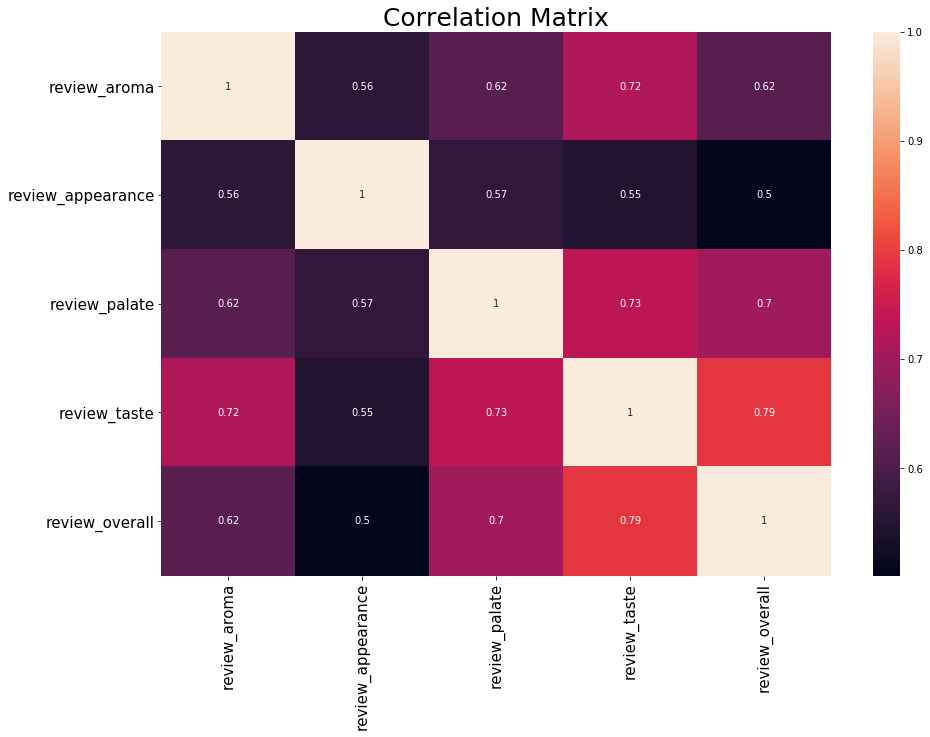

In [14]:
#Checking correlation value to determine most contributing to overall review factors

plt.figure(figsize=(15,10))
sns.heatmap(df_q3.drop(['beer_beerid', 'beer_name'],axis=1).corr(), annot=True)
plt.title('Correlation Matrix', fontsize=25)
plt.xticks(fontsize=15, rotation='vertical')
plt.yticks(fontsize=15,rotation='horizontal')


### Answer:  Factor contributing the most to the overall quality of a beer is review_taste with a correlation coefficient of 0.79

# Question 4
## Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

In [15]:
# Feature Selection

df_q4=df[['beer_style', 'review_aroma', 'review_appearance']]


In [16]:
#Check for null values and infrequent beer styles

df_q4['beer_style'].value_counts().sort_values(ascending=False).tail()

df_q4.isnull().sum()

beer_style           0
review_aroma         0
review_appearance    0
dtype: int64

In [17]:
#Add a column summing up the ratings of aroma and appearance for each beer style

df_q4=df_q4.copy()

df_q4['aroma_appear']=df_q4[['review_aroma', 'review_appearance']].mean(axis=1)

df_q4.head()


,beer_style,review_aroma,review_appearance,aroma_appear
0,Hefeweizen,2.0,2.5,2.25
1,English Strong Ale,2.5,3.0,2.75
2,Foreign / Export Stout,2.5,3.0,2.75
3,German Pilsener,3.0,3.5,3.25
4,American Double / Imperial IPA,4.5,4.0,4.25


In [18]:
df_q4[['beer_style', 'aroma_appear']].groupby('beer_style').mean().reset_index().sort_values(
    by='aroma_appear', ascending=False).head(1)

,beer_style,aroma_appear
11,American Double / Imperial Stout,4.162149



### Answer: Taking into account aroma and appearance ratings, I would recommend the American Double / Imperial Stout beer style

# Visualizations

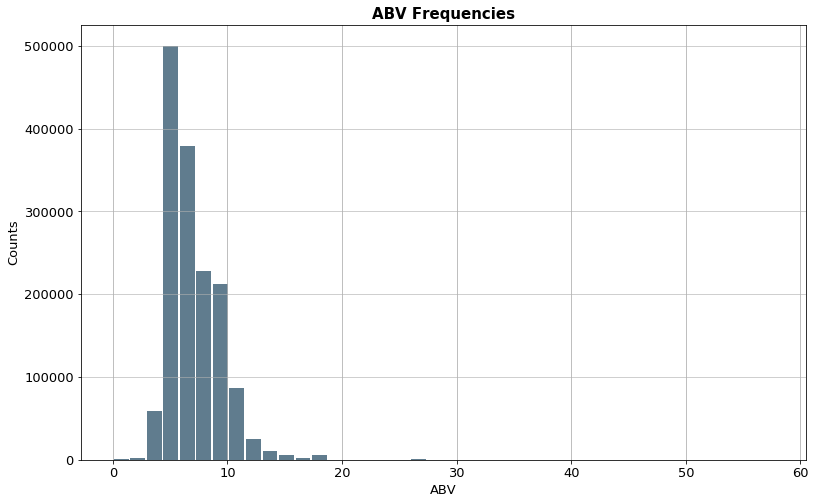

In [19]:
#Histogram of ABV Frequencies

plt.figure(figsize=(13,8))
q1_plot=pd.Series(df_q1['beer_abv'])
q1_plot.plot.hist(grid=True, bins=40, rwidth=0.9,
                   color='#607c8e')
plt.title('ABV Frequencies', fontsize=15, fontweight='bold')
plt.xlabel('ABV', fontsize=13)
plt.ylabel('Counts', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.grid(axis='y', alpha=0.75)

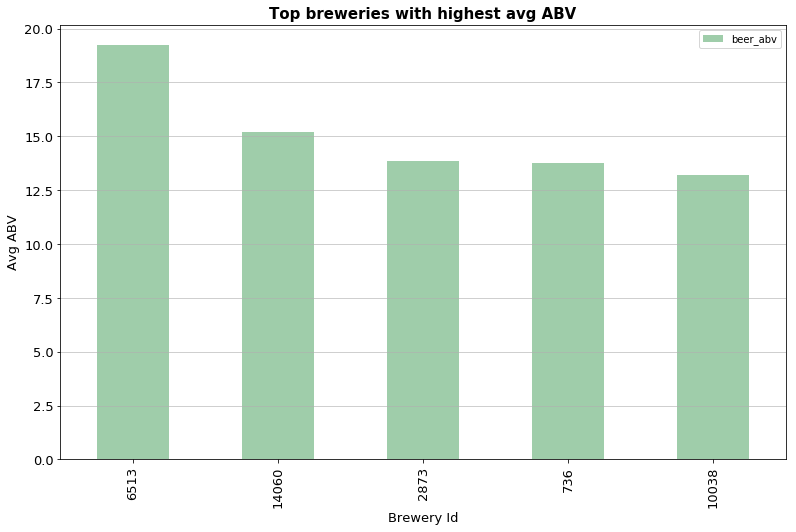

In [20]:
# Bar plots with with avg beer ABV in 5 breweries producing on average highest ABV rated beers

top5abv=df_q1.groupby('brewery_id').mean().reset_index().sort_values(by='beer_abv', ascending=False).head(5)

plt.rc('figure', figsize=[13,8])

top5abv.plot.bar(x='brewery_id', y='beer_abv', color='#9FCDAA')

plt.title('Top breweries with highest avg ABV', fontsize=15, fontweight='bold')
plt.xlabel('Brewery Id', fontsize=13)
plt.ylabel('Avg ABV', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.grid(axis='y', alpha=0.75)



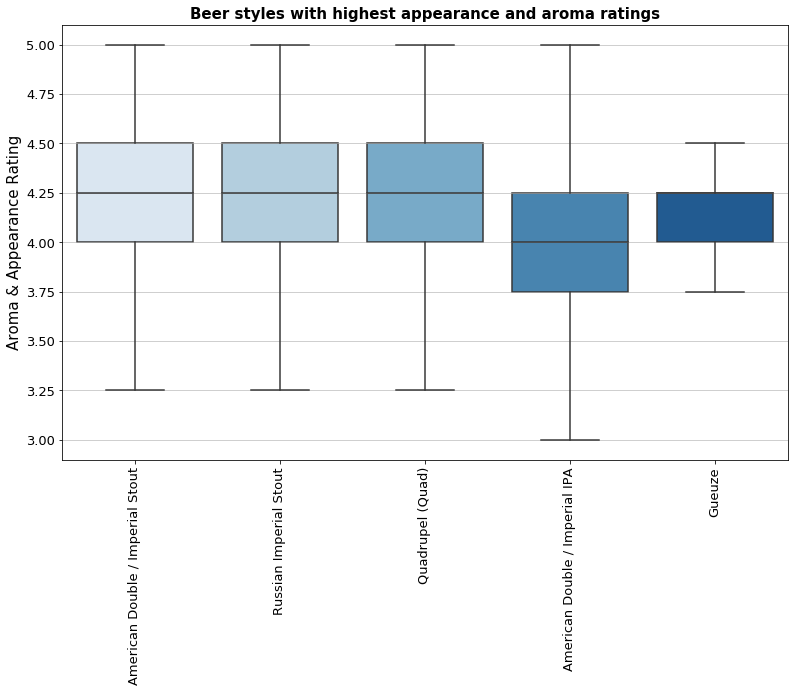

In [21]:
# Boxplots of beer and aroma reviews per each of the 5 best rated beer styles

top_arapp=df_q4[['beer_style', 'aroma_appear']].groupby('beer_style').mean().reset_index().sort_values(
    by='aroma_appear', ascending=False).head(5)

box_tb=df[df['beer_style'].isin(top_arapp['beer_style'])][['beer_style','review_aroma','review_appearance']]
box_tb['aroma_appear']=box_tb[['review_aroma','review_appearance']].mean(axis=1)


plt.figure(figsize=(13,8))
sns.boxplot(data=box_tb, x='beer_style', y='aroma_appear', showfliers=False, palette='Blues', order=list(top_arapp['beer_style']))

plt.title('Beer styles with highest appearance and aroma ratings', fontsize=15, fontweight='bold')
plt.xlabel('', fontsize=13)
plt.ylabel('Aroma & Appearance Rating', fontsize=15)
plt.xticks(fontsize=13, rotation='vertical')
plt.yticks(fontsize=13)

plt.grid(axis='y', alpha=0.75)

